# Fisher Linear Discriminant

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


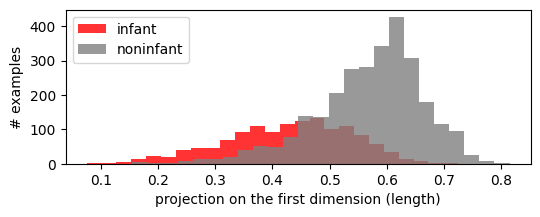

In [29]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)

# Project data on the first dimension
w = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [30]:
def fisher(X1,X2):
    ##### Replace by your code
    # calculate m1,m2
    m1 = numpy.mean(X1, axis=0).reshape(-1, 1)  
    m2 = numpy.mean(X2, axis=0).reshape(-1, 1)
    # 计算类间散布矩阵 Sb
    mean_diff = m1 - m2

    # 计算每个类别的协方差矩阵
    S1 = numpy.cov(X1, rowvar=False)
    S2 = numpy.cov(X2, rowvar=False)  

    # 计算类内散布矩阵 Sw
    Sw = S1 + S2 

    # 计算 Sw 的逆矩阵，如果 Sw 是奇异的，可以使用伪逆
    try:
        Sw_inv = numpy.linalg.inv(Sw)
    except numpy.linalg.LinAlgError:
        Sw_inv = numpy.linalg.pinv(Sw)

    # 计算 Fisher 判别向量 w = Sw^{-1} (m1 - m2)
    w = Sw_inv @ mean_diff 

    return w
    #####
    
def objective(X1,X2,w):
    ##### Replace by your code
    # Compute the mean vectors
    # 确保 w 是二维列向量
    w = numpy.asarray(w).reshape(-1, 1) 
    
    # 计算每个类别的均值向量，并转换为列向量
    m1 = numpy.mean(X1, axis=0).reshape(-1, 1)  
    m2 = numpy.mean(X2, axis=0).reshape(-1, 1) 
    
    # 计算 Sb = (m1 - m2) (m1 - m2)^T
    mean_diff = m1 - m2  
    Sb = numpy.matmul(mean_diff, mean_diff.T)  
    
    # 计算类内散布矩阵 S_w
    S1 = numpy.cov(X1, rowvar=False) 
    S2 = numpy.cov(X2, rowvar=False) 
    S_w = S1 + S2  
    
    # 计算分子: w^T Sb w
    temp1 = numpy.matmul(w.T, Sb)  
    numerator = numpy.matmul(temp1, w)[0][0] 
    
    # 计算分母: w^T S_w w
    temp2 = numpy.matmul(w.T, S_w)     
    denominator = numpy.matmul(temp2, w)[0][0]
    
    # 防止分母为零
    if denominator == 0:
        return numpy.inf
    
    J = numerator / denominator
    return J
    #####
    
def expand(X):
    ##### Replace by your code
    n_samples, d = X.shape
    num_quad = d * (d + 1) // 2
    Z = numpy.zeros((n_samples, d + num_quad))
    Z[:, :d] = X
    idx = d
    for i in range(d):
        for j in range(i, d):
            Z[:, idx] = X[:, i] * X[:, j]
            idx += 1
    return Z
    #####

## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

First dimension (length): 0.9561309651328889


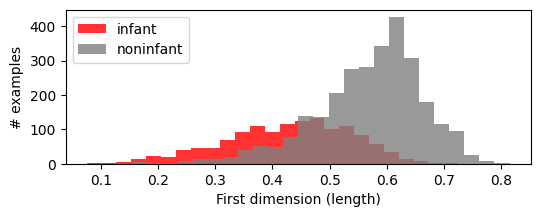

Means Linear: 1.1883374608649935


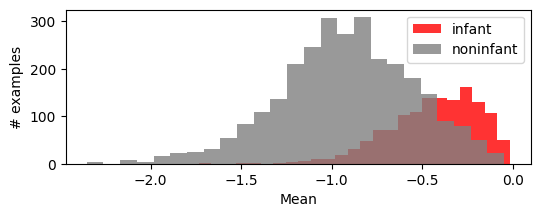

Fisher: 1.2971255810607727


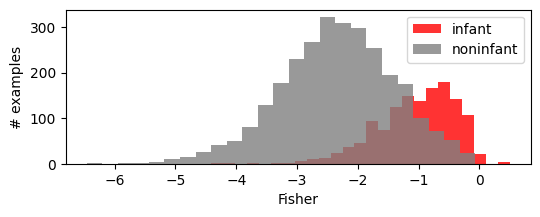

Fisher after expansion: 1.6795399749959639


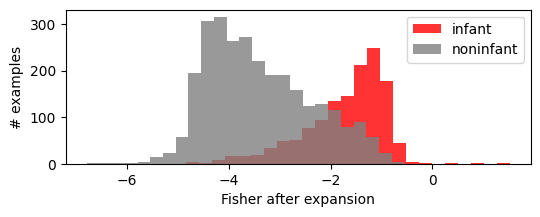

In [31]:
##### REPLACE BY YOUR CODE

# Project data on the first dimension
w = numpy.array([1,0,0,0,0,0,0])
print('First dimension (length):', objective(abalone.I, abalone.N, w))
abalone.plot(w,'First dimension (length)')

# Mean
m1 = numpy.mean(abalone.I, axis=0).reshape(-1, 1)
m2 = numpy.mean(abalone.N, axis=0).reshape(-1, 1)
w = m1-m2
print('Means Linear:', objective(abalone.I, abalone.N, w))
abalone.plot(w,'Mean')


w = fisher(abalone.I, abalone.N)
print('Fisher:', objective(abalone.I, abalone.N, w))
abalone.plot(w,'Fisher')


# Expand the data
I = expand(abalone.I)
N = expand(abalone.N)
w = fisher(I, N)
print('Fisher after expansion:', objective(I, N, w))
abalone.N = N
abalone.I = I
abalone.plot(w,'Fisher after expansion')
#####